ASSIGNMENT 5

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

CNN = Sequential(name="Sequential_CNN")

CNN.add(Conv2D(16, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu", input_shape=(32, 32, 3)))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

CNN.add(Conv2D(32, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu"))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

CNN.add(Flatten())

CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(32, activation='relu'))
CNN.add(Dense(10, activation='softmax'))

CNN.summary()

Model: "Sequential_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)             

In [ ]:
from matplotlib import pyplot
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

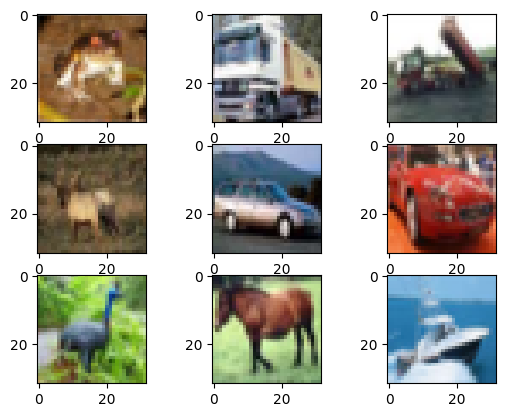

In [ ]:
for i in range(0, 9):
    pyplot.subplot(3,3,i + 1)
    pyplot.imshow((x_train[i]))

pyplot.show()

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
lr_rate = 0.01
batch_size = 35
epochs = 5
n_classes = 10
CNN.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
output = CNN.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test))

Epoch 1/5
1429/1429 [==============================] - 16s 11ms/step - loss: 1.7275 - accuracy: 0.3599 - val_loss: 1.5297 - val_accuracy: 0.4357
Epoch 2/5
1429/1429 [==============================] - 15s 10ms/step - loss: 1.4526 - accuracy: 0.4677 - val_loss: 1.3962 - val_accuracy: 0.4894
Epoch 3/5
1429/1429 [==============================] - 15s 11ms/step - loss: 1.3606 - accuracy: 0.5048 - val_loss: 1.3161 - val_accuracy: 0.5249
Epoch 4/5
1429/1429 [==============================] - 17s 12ms/step - loss: 1.2878 - accuracy: 0.5327 - val_loss: 1.3226 - val_accuracy: 0.5261
Epoch 5/5
1429/1429 [==============================] - 15s 11ms/step - loss: 1.2393 - accuracy: 0.5528 - val_loss: 1.2278 - val_accuracy: 0.5537


In [ ]:
print(CNN.evaluate(x_test, y_test))

313/313 [==============================] - 1s 4ms/step - loss: 1.2278 - accuracy: 0.5537
[1.2278002500534058, 0.5536999702453613]


ASSIGNMENT 6

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cdf = pd.read_csv("/content/drive/MyDrive/connsumerComplaintsSmall.csv")

In [ ]:
cdf = cdf.dropna(subset=['Consumer complaint narrative'])


X = cdf.drop(['Product'], axis=1)
y = cdf['Product']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_seq_length = 200
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['Consumer complaint narrative'])
vocab_size = len(tokenizer.word_index) + 1
X_train_text = tokenizer.texts_to_sequences(X_train['Consumer complaint narrative'])
X_test_text = tokenizer.texts_to_sequences(X_test['Consumer complaint narrative'])
X_train_text = pad_sequences(X_train_text, maxlen=max_seq_length, padding='post')
X_test_text = pad_sequences(X_test_text, maxlen=max_seq_length, padding='post')


num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length))
model.add(LSTM(100))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 32
num_epochs = 10
model.fit(X_train_text, y_train, validation_data=(X_test_text, y_test), epochs=num_epochs, batch_size=batch_size)

loss, accuracy = model.evaluate(X_test_text, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.7173 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 167ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.7191 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 175ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.7027 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 186ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6857 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6761 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 182ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6757 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 167ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6817 - val_accuracy: 1.0000
Epoch 8/10


ASSIGNMENT 7

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Load the datasets
train_df = pd.read_csv('/content/drive/MyDrive/emotion-labels-train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/emotion-labels-test.csv')

In [ ]:
train_df.head()

text label
0  Just got back from seeing @GaryDelaney in Burs...   joy
1  Oh dear an evening of absolute hilarity I don'...   joy
2  Been waiting all week for this game ❤️❤️❤️ #ch...   joy
3  @gardiner_love : Thank you so much, Gloria! Yo...   joy
4  I feel so blessed to work with the family that...   joy

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report


train_df = pd.read_csv('/content/drive/MyDrive/emotion-labels-train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/emotion-labels-test.csv')


X_train = train_df['text']
y_train = train_df['label']
X_test = test_df['text']
y_test = test_df['label']


label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


max_seq_length = 100
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_train = pad_sequences(X_train, maxlen=max_seq_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_seq_length, padding='post')


embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


batch_size = 32
num_epochs = 10
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=batch_size)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)


y_test_emotions = label_encoder.inverse_transform(y_test)
y_pred_emotions = label_encoder.inverse_transform(y_pred_labels)

print(classification_report(y_test_emotions, y_pred_emotions))


Epoch 1/10
113/113 [==============================] - 114s 935ms/step - loss: 1.3193 - accuracy: 0.3629 - val_loss: 1.1559 - val_accuracy: 0.4764
Epoch 2/10
113/113 [==============================] - 102s 903ms/step - loss: 0.6388 - accuracy: 0.7573 - val_loss: 0.9072 - val_accuracy: 0.6862
Epoch 3/10
113/113 [==============================] - 111s 985ms/step - loss: 0.1929 - accuracy: 0.9419 - val_loss: 0.9360 - val_accuracy: 0.7136
Epoch 4/10
113/113 [==============================] - 101s 892ms/step - loss: 0.1185 - accuracy: 0.9701 - val_loss: 0.9013 - val_accuracy: 0.7327
Epoch 5/10
113/113 [==============================] - 105s 929ms/step - loss: 0.0766 - accuracy: 0.9806 - val_loss: 0.9241 - val_accuracy: 0.7467
Epoch 6/10
113/113 [==============================] - 102s 904ms/step - loss: 0.0644 - accuracy: 0.9823 - val_loss: 0.9681 - val_accuracy: 0.7292
Epoch 7/10
113/113 [==============================] - 104s 926ms/step - loss: 0.0629 - accuracy: 0.9798 - val_loss: 1.0246 -